,learning_hours_per_week,attendance_percent,assignments_completed,prior_knowledge_score,final_grade
0,2,60,3,40,4.7
1,3,65,4,42,4.5
2,4,70,5,45,4.2
3,5,72,6,48,4.0
4,6,75,6,50,3.8


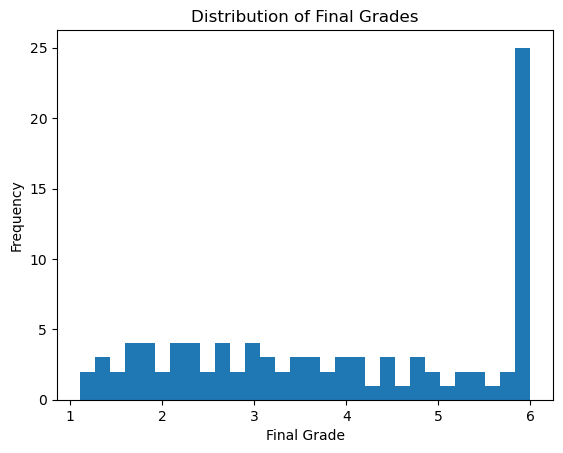

In [6]:
import pandas as pd

# 1) Daten laden
df = pd.read_csv("data.csv")

# Merkmale und Zielvariable definieren
y = df["final_grade"]
X = df.drop(columns=["final_grade"])

display(df.head())

import matplotlib.pyplot as plt

plt.hist(y, bins=30)
plt.title("Distribution of Final Grades")
plt.xlabel("Final Grade")
plt.ylabel("Frequency")
plt.show()


In [7]:
# 2) Train/Test-Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2
)

In [8]:
# 3) Feature Scaling (klassischer Preprocessing-Schritt)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4) Modell definieren & trainieren
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [9]:
# 5) Vorhersagen
y_pred = model.predict(X_test_scaled)

# Alternative: Vorhersage für einen einzelnen Datenpunkt
import pandas as pd
single_data_point = pd.DataFrame([[2, 100, 6, 80]],
                                 columns=['learning_hours_per_week', 'attendance_percent',
                                         'assignments_completed', 'prior_knowledge_score'])

single_data_point_scaled = scaler.transform(single_data_point)
single_prediction = model.predict(single_data_point_scaled)
print(f"Vorhersage für einzelnen Datenpunkt: {single_prediction[0]:.1f}")

# 6) Evaluation
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print("Evaluation auf Testdaten:")
print(f"RMSE: {rmse:.3f}")
print(f"R²  : {r2:.3f}")

Vorhersage für einzelnen Datenpunkt: 3.2
Evaluation auf Testdaten:
RMSE: 0.160
R²  : 0.987


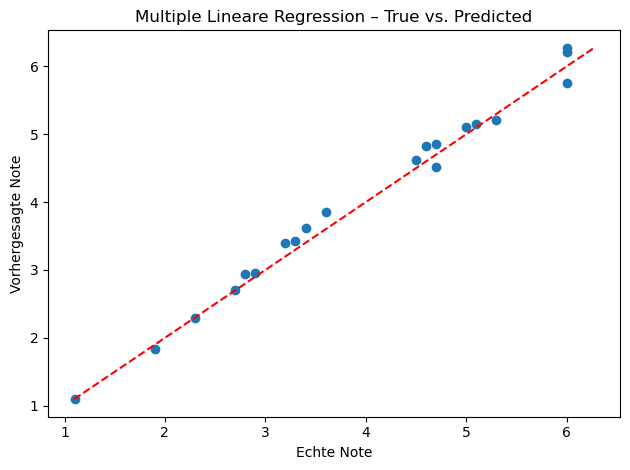

In [10]:

# 7) Plot: True vs. Predicted

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Echte Note")
plt.ylabel("Vorhergesagte Note")
plt.title("Multiple Lineare Regression – True vs. Predicted")

# Referenzlinie y = x
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--", color="red")

plt.tight_layout()
plt.show()

import numpy as np
import plotly.graph_objects as go

x = X_test_scaled[:, 2]
y = X_test_scaled[:, 3]
z = y_test

fig = go.Figure()

# points
fig.add_trace(go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers',
    marker=dict(size=5, opacity=0.8)
))

# regression plane for those two features
xx, yy = np.meshgrid(
    np.linspace(x.min(), x.max(), 30),
    np.linspace(y.min(), y.max(), 30)
)

zz = model.intercept_ + model.coef_[2]*xx + model.coef_[3]*yy


fig.add_trace(go.Surface(
    x=xx, y=yy, z=zz,
    opacity=0.5
))

fig.update_layout(
    title='3D Scatter Plot + Regression Plane (Features 1 & 3)',
    scene=dict(
        xaxis_title='Assignments (scaled)',
        yaxis_title='Prior Knowledge (scaled)',
        zaxis_title='Note'
    )
)

fig.show()
